<a href="https://colab.research.google.com/github/daman1209arora/cnn-mnist/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch 
import torchvision

In [29]:
hparameters = {
    "train_batch_size" : 64,
    "test_batch_size" : 1000,
    "epochs" : 100,
    "alpha" : 0.01,
    "log_interval" : 10
}

In [5]:
random_seed = 1
torch.backends.cudnn.enabled = False 
torch.manual_seed(random_seed)

In [6]:
data_dir = './sample_data'

Dataset

In [8]:
train_set =  torchvision.datasets.MNIST(data_dir, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
# 0.1307 and 0.3081  -> mean and std deviation of MNIST dataset

train_loader = torch.utils.data.DataLoader(train_set,
  batch_size=hparameters['train_batch_size'], shuffle=True)

test_set = torchvision.datasets.MNIST(data_dir, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
test_loader = torch.utils.data.DataLoader(train_set,
  batch_size=hparameters['test_batch_size'], shuffle=True)

In [13]:
example = enumerate(train_loader)
batch_id, (data,label) = next(example)

In [14]:
data.shape

torch.Size([64, 1, 28, 28])

In [15]:
label

tensor([7, 6, 1, 5, 0, 1, 6, 8, 9, 7, 6, 0, 7, 5, 2, 3, 8, 1, 2, 8, 0, 2, 9, 9,
        2, 3, 8, 8, 0, 9, 2, 5, 7, 6, 0, 1, 4, 7, 7, 0, 0, 9, 4, 5, 1, 1, 4, 3,
        6, 5, 9, 0, 9, 8, 9, 9, 7, 1, 5, 0, 6, 6, 9, 8])

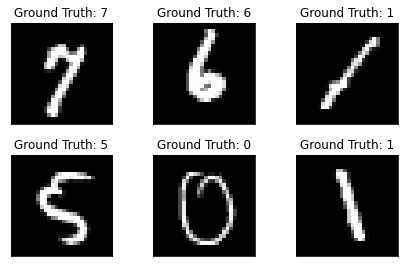

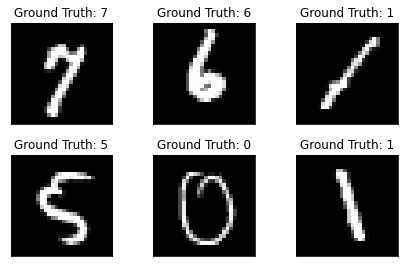

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(label[i]))
  plt.xticks([])
  plt.yticks([])
fig

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


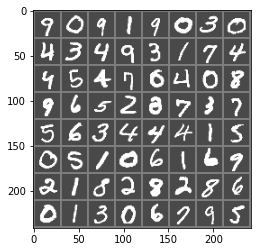

tensor(9) tensor(0) tensor(9) tensor(1)


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(4)))

Model

In [36]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet,self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size =5, stride = (1,1))
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size =3, stride=(1,1))
    self.pool = nn.MaxPool2d(kernel_size =2, stride=2)
    self.fc1 = nn.Linear(in_features = 16*5*5, out_features=120)
    self.fc2 = nn.Linear(in_features = 120, out_features = 84)
    self.fc3 = nn.Linear(in_features=84,out_features=10)

  def forward(self,x):
    layer1 = self.pool(F.relu(self.conv1(x)))
    layer2 = self.pool(F.relu(self.conv2(layer1)))
    one_hot = layer2.view(-1,400)
    layer3 = F.relu(self.fc1(one_hot))
    layer4 = F.relu(self.fc2(layer3))
    out = F.softmax(self.fc3(layer4),dim=1) 
    return out

model = ConvNet()

Loss and optimizer

In [37]:
import torch.optim

criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=hparameters['alpha'])

In [38]:
for epoch in range(5):
  print(epoch)
  e_loss = 0.0
  for i,data in enumerate(train_loader):
    input,label = data
    optimizer.zero_grad()
    output = model(input)
    loss = criteria(output,label)
    loss.backward()
    optimizer.step()

    e_loss+=loss.item()
  print("loss %f",e_loss)
  e_loss=0
print("trained")

0
loss %f 1642.5920859575272
1
loss %f 1824.930666089058
2
loss %f 1742.584046125412
3
loss %f 1857.395438194275
4
loss %f 1931.5372023582458
trained


In [40]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy ',(100 * correct / total))

Accuracy of the network on the 10000 test images: 47 %


60000